In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### First figure: mean/confidence intervals of accuracy of the 3 different models (neural networks, random forest, svm)

TODO: needs errorbar/confidence interval on it

In [5]:
N = 50 # these values come from 50 fold cross-validation
nnAvgAcc = 0.594903228283
svmAvgAcc = 0.374817204301
rfAvgAcc = 0.620494623656

nnCI = [0.0050792687831308627, 0.0099307041932673312]
svmCI = [0.0068050431568844405, 0.013304842389494861]
rfCI = [0.0065273438154912315, 0.01276190006220553]

nnErr = nnCI[1]-nnCI[0]
svmErr = svmCI[1]-svmCI[0]
rfErr = rfCI[1]-rfCI[0]

               Mean: 0.578817203641
Confidence Interval: [0.0076236099320692707, 0.014905258680476537]
SVM avg accuracy:
               Mean: 0.374817204301
Confidence Interval: [0.0068050431568844405, 0.013304842389494861]
Random forest avg accuracy:
               Mean: 0.61864516129
Confidence Interval: [0.0055217787544315508, 0.010795875109630931]


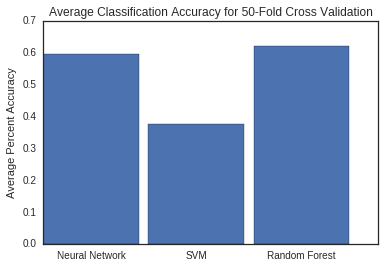

In [8]:
sns.set_style("white")
fig = plt.figure()
plt.bar([0, 0.011, 0.022], [nnAvgAcc, svmAvgAcc, rfAvgAcc], width=.01)
       # yerr=[nnErr, svmErr, rfErr], ecolor='k')
plt.ylabel('Average Percent Accuracy')
plt.xticks(np.arange(.005, .03, .011), ('Neural Network', 'SVM', 'Random Forest'))
plt.title('Average Classification Accuracy for 50-Fold Cross Validation')
plt.show()
fig.savefig('/home/jenna/Research/COPDImageAnalysis/figures/projects_02_avgAccuracy_noErrorbar.pdf')

In [13]:
import pandas as pd
from __future__ import print_function

# going to figure out the prevalence of the different classes
def loadAnnotationClasses(filename):
    """
    Load the classes associated with the labeled patches.

    Inputs:
    - filename: name of the file to extract labels from

    Returns:
    - classes: class labels for each patch
    - ids: subject ids
    - indices: patch mask ids
    """
    # load the .csv file using pandas
    dataframe = pd.read_csv(filename)
    print('Loaded the patch classes.')
    # extract the column header associated with the labels
    col = list(dataframe)[1]
    print(list(dataframe))
    print('Looking at column with header', col)
    # extract the label column and convert it to a list
    classes = dataframe[col].values.tolist()
    # extract the column header associated with the ids
    col = list(dataframe)[0]
    # extract the id column and convert it to a list
    ids = dataframe[col].values.tolist()
    # and the patch count
    col = list(dataframe)[2]
    # extract the count column and convert it to a list
    indices = dataframe[col].values.tolist()
    # return the list of labels
    print('Classes for',len(classes), 'patches have been extracted from the file!')
    return classes #, ids, indices

rootPath = '/home/jenna/Research/COPDImageAnalysis/annotations/'
annotationClassesFn = rootPath + 'data/annotationClasses.csv'

classes = loadAnnotationClasses(annotationClassesFn)

Loaded the patch classes.
['sid', 'type', 'count']
Looking at column with header type
Classes for 1526 patches have been extracted from the file!


In [16]:
uniqueClasses = np.unique(classes)
print(uniqueClasses)
print(len(uniqueClasses))

for u in uniqueClasses:
    count = float(classes.count(u))
    print(u, count/len(classes)*100.0)

['MILDCENTRILOBULAREMPHYSEMA' 'MILDPANLOBULAREMPHYSEMA'
 'MILDPARASEPTALEMPHYSEMA' 'MODERATEBULLA' 'MODERATECENTRILOBULAREMPHYSEMA'
 'MODERATEPANLOBULAREMPHYSEMA' 'MODERATEPARASEPTALEMPHYSEMA'
 'NORMALPARENCHYMA' 'SEVEREBULLA' 'SEVERECENTRILOBULAREMPHYSEMA'
 'SEVEREPANLOBULAREMPHYSEMA' 'SEVEREPARASEPTALEMPHYSEMA']
12
MILDCENTRILOBULAREMPHYSEMA 13.8269986894
MILDPANLOBULAREMPHYSEMA 0.917431192661
MILDPARASEPTALEMPHYSEMA 6.02883355177
MODERATEBULLA 0.131061598952
MODERATECENTRILOBULAREMPHYSEMA 18.872870249
MODERATEPANLOBULAREMPHYSEMA 4.25950196592
MODERATEPARASEPTALEMPHYSEMA 7.27391874181
NORMALPARENCHYMA 29.2267365662
SEVEREBULLA 0.131061598952
SEVERECENTRILOBULAREMPHYSEMA 11.6644823067
SEVEREPANLOBULAREMPHYSEMA 5.04587155963
SEVEREPARASEPTALEMPHYSEMA 2.62123197903
